## Bus Engine Replacement Prediction

Given *data about buses*, let's try to predict which engines will **be replaced**.

We will use a logsitic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/erichschulman/bus1234.csv

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("bus1234.csv")
data

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...,...
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8260 non-null   int64  
 1   id          8260 non-null   float64
 2   group       8260 non-null   float64
 3   year        8260 non-null   float64
 4   month       8260 non-null   float64
 5   replace     8260 non-null   float64
 6   miles       8260 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 451.8 KB


### Exploratory Data Analysis

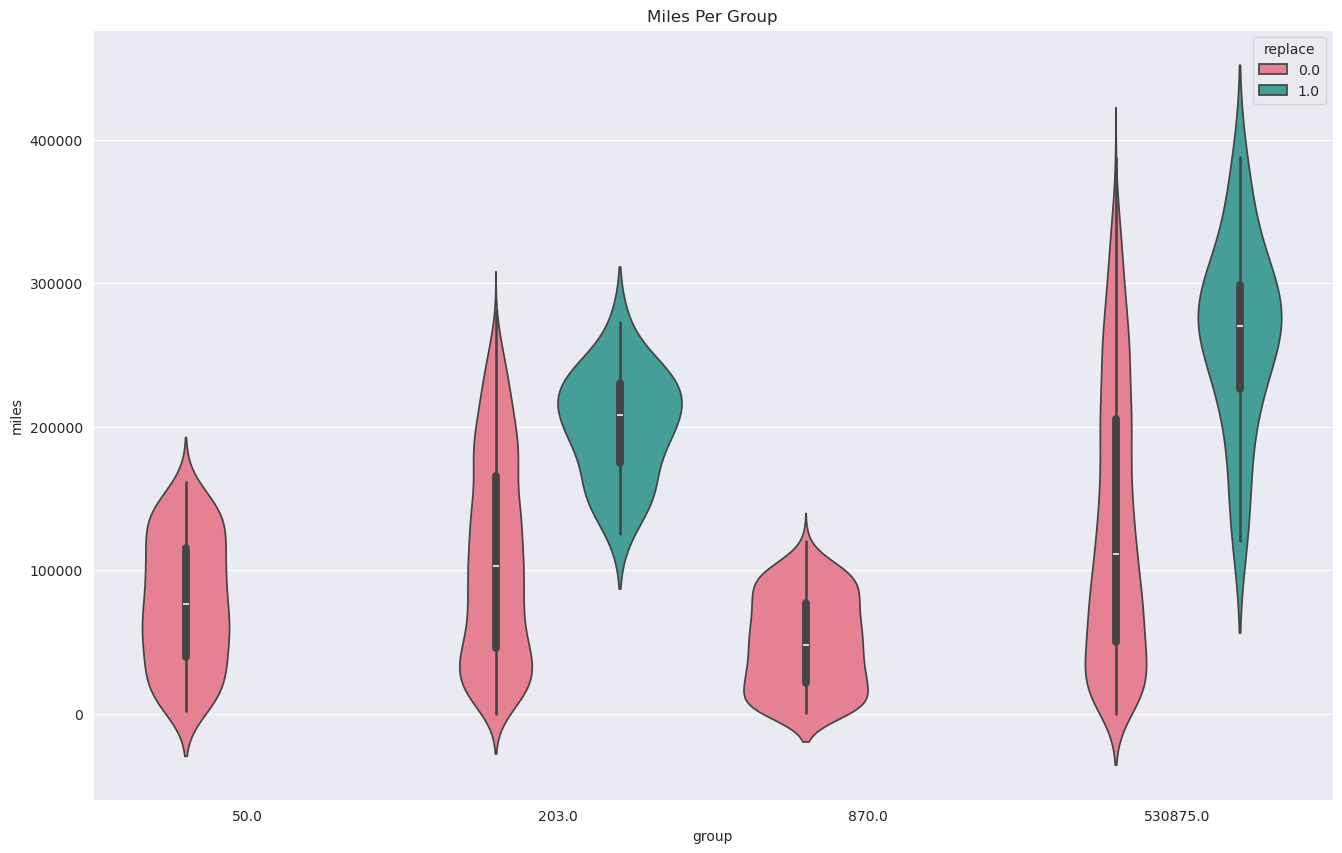

In [4]:
plt.figure(figsize=(16, 10))
sns.violinplot(x=data['group'], y=data['miles'], hue=data['replace'], palette='husl')
plt.title("Miles Per Group")
plt.show()

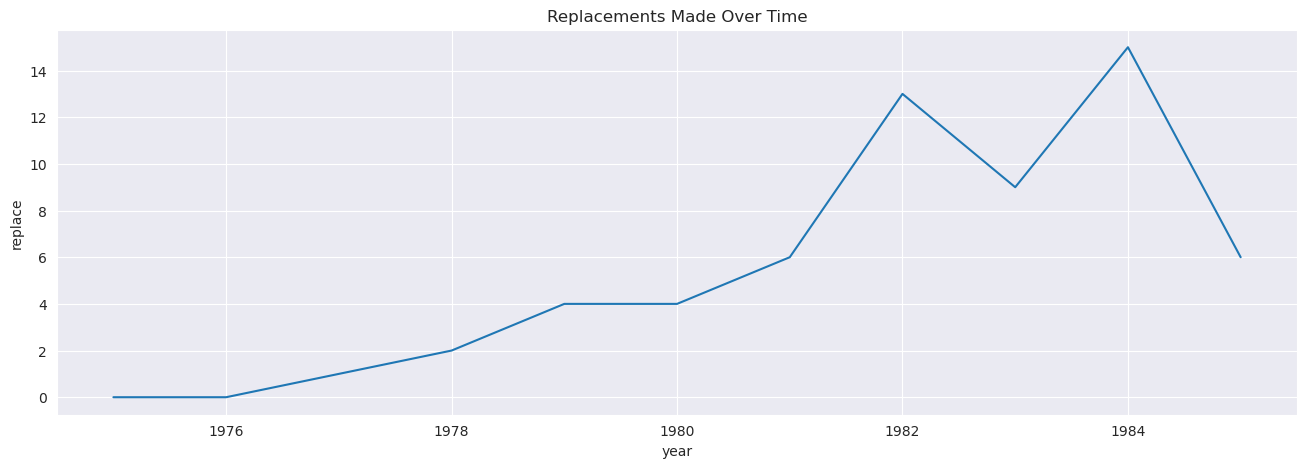

In [5]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=data.groupby(by='year').sum()['replace'])
plt.title('Replacements Made Over Time')
plt.show()

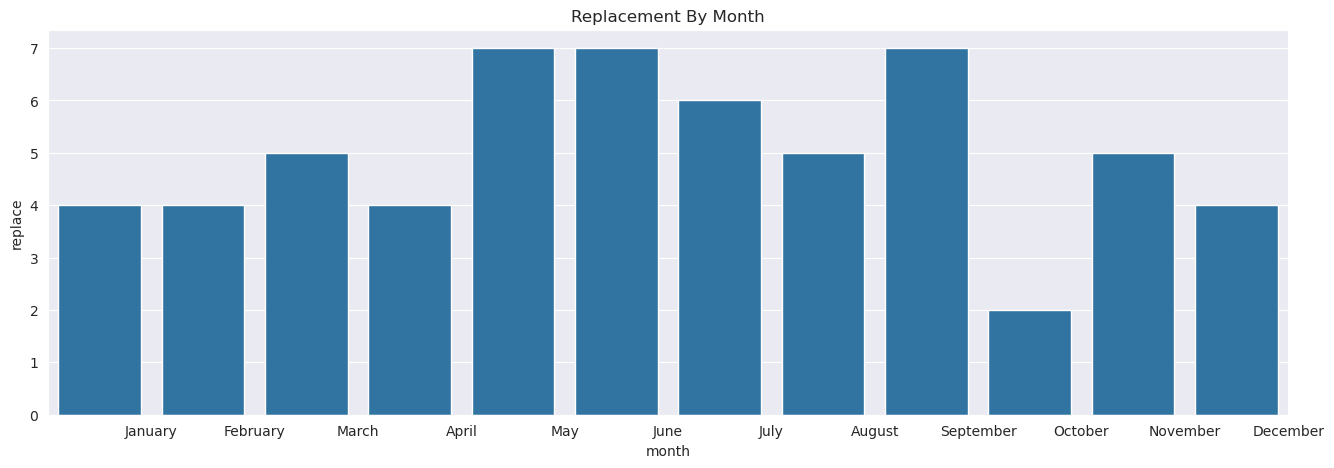

In [6]:
plt.figure(figsize=(16, 5))
sns.barplot(x=data['month'], y=data.groupby(by='month').sum()['replace'])
plt.xticks(
    ticks=np.arange(12) + 0.5,
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.title('Replacement By Month')
plt.show()

### Preprocessing

In [7]:
df = data.copy()

In [8]:
df

,Unnamed: 0,id,group,year,month,replace,miles
0,0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...,...
8255,8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [9]:
# Drop the index and id columns
df = df.drop(['Unnamed: 0'], axis=1)
df

,id,group,year,month,replace,miles
0,144.0,50.0,1981.0,5.0,0.0,2208.0
1,144.0,50.0,1981.0,6.0,0.0,5418.0
2,144.0,50.0,1981.0,7.0,0.0,8547.0
3,144.0,50.0,1981.0,8.0,0.0,11566.0
4,144.0,50.0,1981.0,9.0,0.0,15890.0
...,...,...,...,...,...,...
8255,95.0,530875.0,1985.0,1.0,0.0,342004.0
8256,95.0,530875.0,1985.0,2.0,0.0,343654.0
8257,95.0,530875.0,1985.0,3.0,0.0,345631.0
8258,95.0,530875.0,1985.0,4.0,0.0,347549.0


In [10]:
df['id'].unique()

array([144., 145., 146., 147.,  96.,  97.,  98.,  99., 100., 101., 102.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161.,
       162.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.])

In [11]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [12]:
# One-hot encoding
for column in ['id', 'group']:
    df = onehot_encode(df, column)

In [13]:
df

,year,month,replace,miles,id_59.0,id_60.0,id_61.0,id_62.0,id_63.0,id_64.0,...,id_157.0,id_158.0,id_159.0,id_160.0,id_161.0,id_162.0,group_50.0,group_203.0,group_870.0,group_530875.0
0,1981.0,5.0,0.0,2208.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1981.0,6.0,0.0,5418.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1981.0,7.0,0.0,8547.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1981.0,8.0,0.0,11566.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1981.0,9.0,0.0,15890.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1985.0,1.0,0.0,342004.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8256,1985.0,2.0,0.0,343654.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8257,1985.0,3.0,0.0,345631.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8258,1985.0,4.0,0.0,347549.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# Split df into X and y
y = df['replace']
X = df.drop('replace', axis=1)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [16]:
X_train

,year,month,miles,id_59.0,id_60.0,id_61.0,id_62.0,id_63.0,id_64.0,id_65.0,...,id_157.0,id_158.0,id_159.0,id_160.0,id_161.0,id_162.0,group_50.0,group_203.0,group_870.0,group_530875.0
5829,1977.0,11.0,114367.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4995,1976.0,8.0,60494.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3600,1984.0,12.0,76750.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8009,1984.0,1.0,329774.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7525,1982.0,9.0,287751.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1982.0,11.0,6057.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7813,1977.0,6.0,57410.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
905,1980.0,5.0,41280.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5192,1983.0,4.0,69653.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
y_train.value_counts()

replace
0.0    5739
1.0      43
Name: count, dtype: int64

### Training

In [18]:
model = LogisticRegression(
    class_weight={
        0: 1.0,
        1: 10.0
    }
)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 10.0})

### Results

In [19]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 98.79%


In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Replacement', 'Replacement']))

                precision    recall  f1-score   support

No Replacement       0.99      0.99      0.99      2461
   Replacement       0.12      0.12      0.12        17

      accuracy                           0.99      2478
     macro avg       0.56      0.56      0.56      2478
  weighted avg       0.99      0.99      0.99      2478

